In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

In [2]:
inventory=pd.read_excel('data/本周库存、本周销售、周转率数据表.xlsx',sheet_name='本周库存数据')
sales=pd.read_excel('data/本周库存、本周销售、周转率数据表.xlsx',sheet_name='本周销售数据')
turnover_rate=pd.read_excel('data/本周库存、本周销售、周转率数据表.xlsx',sheet_name='周转率')

In [3]:
inventory.head()

,日期,商品名称,商品类别,库存数量,成本价,销售单价,期初库存数据,占比
0,2018-09-24,尖叫,饮料,66,3.2,5.0,211.2,NaN
1,2018-09-24,可口可乐-智能,饮料,72,2.3,3.0,165.6,NaN
2,2018-09-24,脉动,饮料,102,3.1,4.0,316.2,NaN
3,2018-09-24,美汁源果粒橙\t,饮料,6,2.5,3.0,15.0,NaN
4,2018-09-24,美汁源果粒橙（450ml/瓶）,饮料,93,2.6,3.0,241.8,NaN


In [4]:
sales.head()

,区域,售货机ID,购买日期,客户ID,支付方式,商品类别,商品ID,商品名称,购买数量,成本价,销售单价,消费金额,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,河东区,73216367826,2018-09-29,105562,支付宝,饮料,26464,名仁苏打水,1,2.0,3.0,3.0,NaN,NaN,NaN,NaN
1,河东区,73183796417,2018-09-27,103210,支付宝,蛋糕糕点,23857,沙琪玛（160g/包）,1,4.0,5.0,5.0,NaN,NaN,NaN,NaN
2,河东区,73199388439,2018-09-27,103204,支付宝,蛋糕糕点,23857,沙琪玛（160g/包）,1,4.0,5.0,5.0,NaN,NaN,NaN,NaN
3,河东区,73199388439,2018-09-30,102781,支付宝,饮料,23850,娃哈哈冰糖雪梨（500ml/瓶）,1,2.2,3.0,3.0,NaN,NaN,NaN,NaN
4,河东区,73199388439,2018-09-30,102498,支付宝,饮料,23850,娃哈哈冰糖雪梨（500ml/瓶）,1,2.2,3.0,3.0,NaN,NaN,NaN,NaN


In [5]:
#计算存销比
df_group=pd.concat([inventory.groupby("商品类别").agg({'库存数量':sum}),sales.groupby("商品类别").agg({'购买数量':sum})],axis=1)
df_group["存销比"]=df_group.库存数量/df_group.购买数量
df_group.head()

,库存数量,购买数量,存销比
商品类别,,,
其它,604,151,4.000000
即食便当,82,32,2.562500
即食熟肉,10,5,2.000000
咖啡,84,40,2.100000
方便速食,859,227,3.784141


In [246]:
df_group.to_excel('库存数量、购买数量.xlsx')

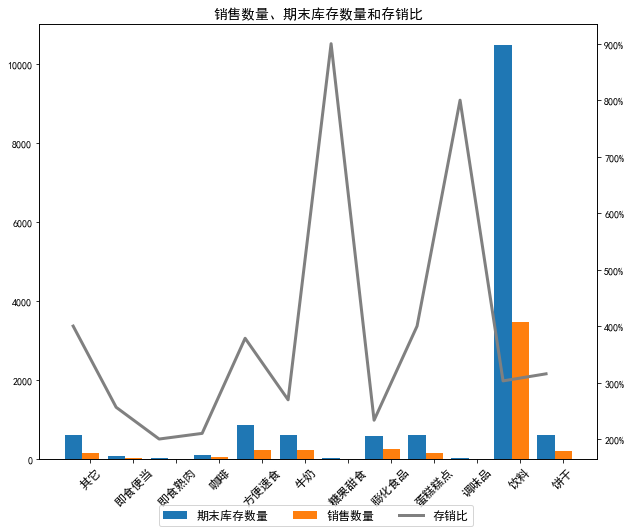

In [96]:
#绘制销售数量、期末库存数量和存销比
plt.rcParams['font.sans-serif'] = ['SimHei']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot()
ax2 = ax.twinx()
total_width, n = 0.8, 2
width = total_width / n
x=np.array(range(0,12,1))
p1=ax.bar(x,df_group.库存数量,width=width,label='期末库存数量')
p2=ax.bar(x+width,df_group.购买数量,width=width,label='销售数量',tick_label =list(df_group.index) )
for tl in ax.get_xticklabels():
    tl.set_rotation(45)
    tl.set_fontsize(12)
p3=ax2.plot(x,df_group.存销比,label='存销比',linewidth=3,color='gray')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
fig.legend(loc='lower center',ncol=3,fontsize=12)
plt.title('销售数量、期末库存数量和存销比',fontsize=14)
plt.savefig('销售数量、期末库存数量和存销比.png',dpi=600)

In [98]:
#计算占比
df_group['占比']=df_group.库存数量/df_group.库存数量.sum()
df_group.head()

,库存数量,购买数量,存销比,占比
商品类别,,,,
其它,604,151,4.000000,0.041532
即食便当,82,32,2.562500,0.005638
即食熟肉,10,5,2.000000,0.000688
咖啡,84,40,2.100000,0.005776
方便速食,859,227,3.784141,0.059066


In [12]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import CurrentConfig, OnlineHostType
#如果pyecharts的图显示不出
# OnlineHostType.NOTEBOOK_HOST 默认值为 http://localhost:8888/nbextensions/assets/
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(df_group.index, df_group.占比)],
        center=["35%", "50%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="库存各类商品占比"),
        legend_opts=opts.LegendOpts(pos_left="18%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
)

AttributeError: 'DataFrame' object has no attribute '占比'

In [248]:
c.render_notebook()

In [147]:
turnover_rate.head()

,月份,出库金额,月初库存金额,月底库存金额
0,1月,26785,10353,10115
1,2月,25675,11352,9354
2,3月,28099,10323,10991
3,4月,29890,10021,10243
4,5月,35678,11434,11658


In [148]:
turnover_rate['平均库存金额']=(turnover_rate.月初库存金额+turnover_rate.月底库存金额)/2
turnover_rate['周转率']=turnover_rate.出库金额/turnover_rate.平均库存金额
turnover_rate.head()

,月份,出库金额,月初库存金额,月底库存金额,平均库存金额,周转率
0,1月,26785,10353,10115,10234.0,2.617256
1,2月,25675,11352,9354,10353.0,2.479958
2,3月,28099,10323,10991,10657.0,2.636671
3,4月,29890,10021,10243,10132.0,2.950059
4,5月,35678,11434,11658,11546.0,3.090074


In [249]:
from pyecharts.charts import Line
c = (
    Line()
    .add_xaxis(list(turnover_rate.月份))
    .add_yaxis("周转率", list(round(turnover_rate.周转率*100,2)), is_connect_nones=True,
              linestyle_opts=opts.LineStyleOpts(color="blue", width=4,),
        itemstyle_opts=opts.ItemStyleOpts(
            border_width=5, border_color="yellow", color="red"))
    .set_global_opts(title_opts=opts.TitleOpts(title="周转率"),
                    yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} %")))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{c}%"))
)

In [250]:
c.render_notebook()

In [8]:
AB=pd.read_excel('data/2020年产品AB销售额.xlsx')
AB.head()

""


In [9]:
AB['月份']=[str(s)+'月份' for s in range(1,13)]
AB['产品A的销售额']=[20,28,23,16,29,36,39,33,31,19,21,25]
AB['产品B的销售额']=[17,22,39,26,35,23,25,27,29,38,28,20]
AB['产品A的占比']=AB.产品A的销售额/AB.产品A的销售额.sum()
AB['产品B的占比']=AB.产品B的销售额/AB.产品B的销售额.sum()
AB.head()

,月份,产品A的销售额,产品B的销售额,产品A的占比,产品B的占比
0,1月份,20,17,0.062500,0.051672
1,2月份,28,22,0.087500,0.066869
2,3月份,23,39,0.071875,0.118541
3,4月份,16,26,0.050000,0.079027
4,5月份,29,35,0.090625,0.106383


In [10]:
AB

,月份,产品A的销售额,产品B的销售额,产品A的占比,产品B的占比
0,1月份,20,17,0.062500,0.051672
1,2月份,28,22,0.087500,0.066869
2,3月份,23,39,0.071875,0.118541
3,4月份,16,26,0.050000,0.079027
4,5月份,29,35,0.090625,0.106383
5,6月份,36,23,0.112500,0.069909
6,7月份,39,25,0.121875,0.075988
7,8月份,33,27,0.103125,0.082067
8,9月份,31,29,0.096875,0.088146
9,10月份,19,38,0.059375,0.115502


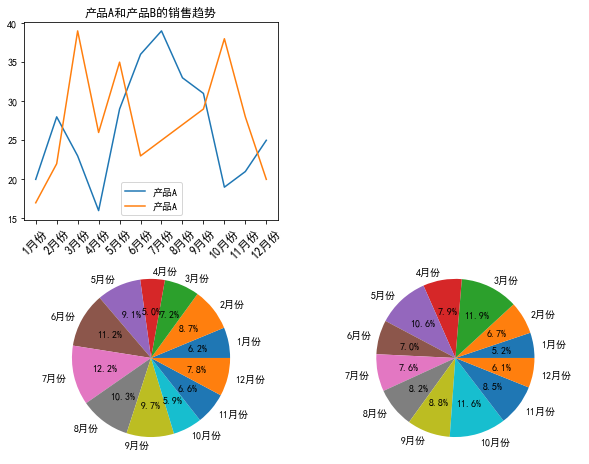

In [343]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].plot(AB.月份,AB.产品A的销售额,label='产品A')
ax[0,0].plot(AB.月份,AB.产品B的销售额,label='产品A')
for tl in ax[0,0].get_xticklabels():
    tl.set_rotation(45)
    tl.set_fontsize(12)
ax[0,0].set_title('产品A和产品B的销售趋势')
ax[0,0].legend(loc='best')
ax[1,0].pie(AB.产品A的占比,autopct='%1.1f%%',labels=AB.月份)
ax[1,1].pie(AB.产品B的占比,autopct='%1.1f%%',labels=AB.月份)
ax[0,1].axis('off')
plt.savefig('产品AB的销售趋势.png',dpi=600)

In [13]:
from pyecharts.charts import Pie, Line,Page

line = (
    Line()
    .add_xaxis(list(AB.月份))
    .add_yaxis("产品A", list(AB.产品A的销售额), is_connect_nones=True,
              linestyle_opts=opts.LineStyleOpts(color="purple", width=4,),
        itemstyle_opts=opts.ItemStyleOpts(
            border_width=5, border_color="yellow", color="red"))
    .add_yaxis("产品B", list(AB.产品B的销售额), is_connect_nones=True,
              linestyle_opts=opts.LineStyleOpts(color="green", width=4,),
        itemstyle_opts=opts.ItemStyleOpts(
            border_width=5, border_color="yellow", color="black"))
    .set_global_opts(title_opts=opts.TitleOpts(title="产品A与产品B的销售趋势"),
                    yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} ")))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{c}"))
)

pie1 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(AB.月份, AB.产品A的占比)],
        radius=["50%", "70%"]
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="产品A各月份占比"),
        legend_opts=opts.LegendOpts(pos_left="18%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
)

pie2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(AB.月份, AB.产品B的占比)],
        radius=["50%", "70%"]
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="产品B各月份占比"),
        legend_opts=opts.LegendOpts(pos_left="18%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
)
page = Page(layout=Page.DraggablePageLayout)
page.add(
        line,
    pie1,
    pie2
    )

In [323]:
page.render_notebook()

In [14]:
page.render('组合图.html')

'/Users/apple/PycharmProjects/DataAnalysis/常见的数据分析模块/可视化/组合图.html'

In [210]:
com=pd.read_excel('data/企业经营数据.xlsx')
com.head()

,研发投入,管理费用,市场投入,地区,利润
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


/Users/apple/opt/anaconda3/envs/DataAnalysis/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


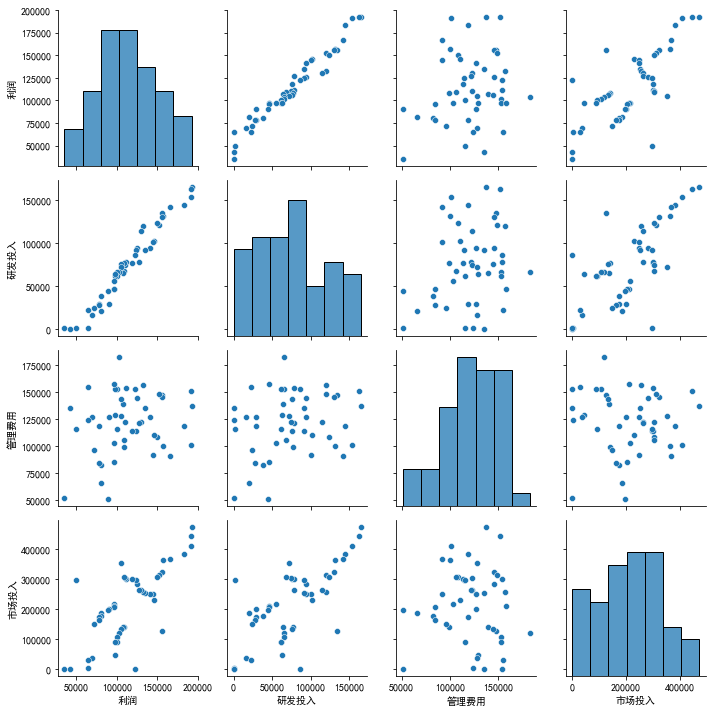

In [212]:
#绘制线性相关系数图
import seaborn as sns
cols = ['利润', '研发投入', '管理费用', '市场投入']
sns.pairplot(com[cols], size=2.5)
plt.tight_layout()
plt.savefig('散点图.png', dpi=600)
plt.show()

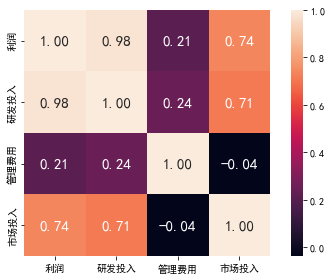

In [214]:
#绘制相关系数的热图
cm = np.corrcoef(com[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.savefig('热图.png', dpi=300)
plt.show()

In [223]:
#桑基图数据
san=pd.read_csv('data/sanky.csv',header=None)
#san.columns=['分类']
san.head()

,0
0,牛仔裤\t服饰\t550
1,毛衣\t服饰\t780
2,短袖\t服饰\t600
3,衬衫\t服饰\t1000
4,鞋子\t服饰\t900


In [229]:
#绘制桑基图要先转化数据为节点和线
nodes=[]
nodes.append({'name':'总支出'})
links=[]
for s in san[0]:
    s1=s.split('\t')
    dict1={}
    dict2={}
    dict1['name']=s1[0]
    dict2['source']=s1[0]
    dict2['target']=s1[1]
    dict2['value']=s1[2]
    nodes.append(dict1)
    links.append(dict2)

In [230]:
nodes

[{'name': '总支出'},
 {'name': '牛仔裤'},
 {'name': '毛衣'},
 {'name': '短袖'},
 {'name': '衬衫'},
 {'name': '鞋子'},
 {'name': '地铁'},
 {'name': '公交'},
 {'name': '火车'},
 {'name': '飞机'},
 {'name': '手机'},
 {'name': '电影票'},
 {'name': '游乐园'},
 {'name': 'KTV'},
 {'name': '外卖'},
 {'name': '奶茶'},
 {'name': '糕点'},
 {'name': '图书资料'},
 {'name': '网课'},
 {'name': '培训'},
 {'name': '门诊'},
 {'name': '住院'},
 {'name': '健身'},
 {'name': '爬山'},
 {'name': '服饰'},
 {'name': '交通'},
 {'name': '娱乐'},
 {'name': '餐饮'},
 {'name': '教育'},
 {'name': '医疗'},
 {'name': '体育'},
 {'name': '衣食住行'},
 {'name': '娱乐教育'},
 {'name': '医疗体育'}]

In [231]:
links

[{'source': '牛仔裤', 'target': '服饰', 'value': '550'},
 {'source': '毛衣', 'target': '服饰', 'value': '780'},
 {'source': '短袖', 'target': '服饰', 'value': '600'},
 {'source': '衬衫', 'target': '服饰', 'value': '1000'},
 {'source': '鞋子', 'target': '服饰', 'value': '900'},
 {'source': '地铁', 'target': '交通', 'value': '300'},
 {'source': '公交', 'target': '交通', 'value': '100'},
 {'source': '火车', 'target': '交通', 'value': '500'},
 {'source': '飞机', 'target': '交通', 'value': '1800'},
 {'source': '手机', 'target': '娱乐', 'value': '300'},
 {'source': '电影票', 'target': '娱乐', 'value': '500'},
 {'source': '游乐园', 'target': '娱乐', 'value': '200'},
 {'source': 'KTV', 'target': '娱乐', 'value': '700'},
 {'source': '外卖', 'target': '餐饮', 'value': '1100'},
 {'source': '奶茶', 'target': '餐饮', 'value': '180'},
 {'source': '糕点', 'target': '餐饮', 'value': '150'},
 {'source': '图书资料', 'target': '教育', 'value': '460'},
 {'source': '网课', 'target': '教育', 'value': '1500'},
 {'source': '培训', 'target': '教育', 'value': '2400'},
 {'source': '门诊', 't

In [251]:
from pyecharts.charts import Sankey
c = (
        Sankey()
        .add(
"费用/元",
            nodes,
            links,
            linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source",type_="dotted"),
            label_opts=opts.LabelOpts(position="right",),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="生活支出桑基图"))
    )

In [252]:
c.render_notebook()